# Week 3 Assignment: Identifying and Mapping Recipients of Public Benefits

### Author: Mica O'Brien 

In this Jupyter Notebook, I explore the distribution of public benefit recipients across Los Angeles using census data from Census Reporter. I use table B19058 - "Public Assistance Income or Food Stamps/SNAP for Households" - to conduct this analysis. Estefany and I are interested in understanding the spatial relationship between affordable housing and health-promoting amenities (like access to grocery stores and open spaces) for our final project, so we thought this would be an interesting and relevant variable for our research. 

I start by exploring the dataset using basic commands covered during the first and second week of class. I remove unnecessary rows and columns and rename remaining columns. I then comfirm that the counts of households receiving benefits and the counts of households not receiving benefits add up to the "Total" column. I do this by creating a new column and comparing the values to the original "Total" column. 

I explore summary statistics for the two populations covered in the dataset and create an additional two columns for percent of population receiving and not receiving benefits. I use these columns to identify census tracts with 0, less than 5, and greater than 20 percent of their populations receiving benefits. I create maps of these various queries and find that the highest concentrations of benefits recipients live in South LA and in the north east, while the lowest concentrations live in the north west of the city. I have a few outstanding questions about why the north eastern part of the city has such a high concentration of benefits recipients given that this area appears to be part of Angeles National Forest.

I start by importing the pandas and geopandas libraries.

In [61]:
import pandas as pd

import geopandas as gpd

I read in the geojson file from Census Reporter, which I uploaded to Jupyter Hub. 

In [62]:
SNAP = gpd.read_file('acs2019_5yr_B19058_14000US06037222001.geojson')

I get a basic understanding of how large my dataset is using the .shape commmand.

In [164]:
SNAP.shape

(1004, 8)

It looks like most of my variables are floats, which makes sense. I'm also glad to see the geometry variable for mapping later on. 

In [64]:
SNAP.dtypes

geoid                 object
name                  object
B19058001            float64
B19058001, Error     float64
B19058002            float64
B19058002, Error     float64
B19058003            float64
B19058003, Error     float64
geometry            geometry
dtype: object

I take a look at the first 5 variables in my dataset using the .head() command. 

In [65]:
SNAP.head(5)

,geoid,name,B19058001,"B19058001, Error",B19058002,"B19058002, Error",B19058003,"B19058003, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,172.0,63.0,1403.0,106.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,17.0,22.0,1295.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,380.0,130.0,1917.0,173.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,201.0,73.0,1156.0,74.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,72.0,62.0,1373.0,103.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I know that I can drop the first variable listed as "0". I use .drop() to do this and will resave my revised dataset shortly.

In [66]:
SNAP = SNAP.drop([0])

I confirm that the "0" variable has been removed. 

In [67]:
SNAP.head(5)

,geoid,name,B19058001,"B19058001, Error",B19058002,"B19058002, Error",B19058003,"B19058003, Error",geometry
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,17.0,22.0,1295.0,67.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,380.0,130.0,1917.0,173.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,201.0,73.0,1156.0,74.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,72.0,62.0,1373.0,103.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,129.0,94.0,49.0,1261.0,131.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221..."


Next, I list out at my column names and drop the variables with "Error" in the title. 

In [68]:
SNAP.columns.to_list()

['geoid',
 'name',
 'B19058001',
 'B19058001, Error',
 'B19058002',
 'B19058002, Error',
 'B19058003',
 'B19058003, Error',
 'geometry']

In [69]:
columns_clean = ['geoid', 'name', 'B19058001', 'B19058002', 'B19058003', 'geometry'] 

I resave my dataframe with my desired columns.

In [70]:
SNAP = SNAP[columns_clean]

I list out my columns again so that I can rename them. I referred to the metadata file from Census Reporter to create the new column names. 

In [71]:
SNAP.columns.to_list()

['geoid', 'name', 'B19058001', 'B19058002', 'B19058003', 'geometry']

In [72]:
SNAP.columns = ['geoid', 'Census_tract', 'Total', 'Cash_public_assistance_or_Food_Stamps', 
                 'No_cash_public_assistance_or_Food_Stamps', 'geometry'] 

I confirm that the column names look the way I want them to using the .head() command again. Good to go!

In [73]:
SNAP.head()

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,380.0,1917.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,201.0,1156.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,94.0,1261.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221..."


Next, I want to make sure that the "Total" variable is equal to the "Cash_public_assistance_or_Food_Stamps" variable plus the "No_cash_public_assistance_or_Food_Stamps" variable. There's a good chance that this is how the "Total" variable is calculated, but I'd like to confirm. I create a new column called "Total_check" using the .assign command. 

In [74]:
SNAP.assign(Total_check=lambda x: x.Cash_public_assistance_or_Food_Stamps + 
            x.No_cash_public_assistance_or_Food_Stamps)

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Total_check
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1312.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,380.0,1917.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",2297.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,201.0,1156.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",1357.0
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",1445.0
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,94.0,1261.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",1355.0
...,...,...,...,...,...,...,...
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,0.0,4.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",4.0
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464...",0.0
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,0.0,24.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905...",24.0
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",0.0


I resave my dataframe with this new column.

In [75]:
SNAP = SNAP.assign(Total_check=lambda x: x.Cash_public_assistance_or_Food_Stamps + 
            x.No_cash_public_assistance_or_Food_Stamps)

I check that the saving worked using the .head() command. It did!

In [76]:
SNAP.head()

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Total_check
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1312.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,380.0,1917.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",2297.0
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,201.0,1156.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",1357.0
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",1445.0
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,94.0,1261.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",1355.0


Now I want to make sure that the values in the "Total_check" column are the same as the ones in the "Total" column. To do this, I decide to create another new column called "Total_confirm", which equals the values in the "Total_check" column minus the values in the "Total" column. All new values in the "Total_confirm" column will idealy be 0, meaning that the "Tota_check" column and the "Total" column are the same. 

In [77]:
SNAP = SNAP.assign(Total_confirm=lambda x: x.Total_check - 
            x.Total)

Making sure the above command worked using the .sample() command. 

In [78]:
SNAP.sample(5)

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Total_check,Total_confirm
699,14000US06037224600,"Census Tract 2246, Los Angeles, CA",819.0,216.0,603.0,"MULTIPOLYGON (((-118.27799 34.02105, -118.2776...",819.0,0.0
326,14000US06037139702,"Census Tract 1397.02, Los Angeles, CA",2229.0,0.0,2229.0,"MULTIPOLYGON (((-118.52971 34.12945, -118.5296...",2229.0,0.0
508,14000US06037203200,"Census Tract 2032, Los Angeles, CA",1321.0,248.0,1073.0,"MULTIPOLYGON (((-118.20340 34.05371, -118.2032...",1321.0,0.0
138,14000US06037119800,"Census Tract 1198, Los Angeles, CA",1486.0,95.0,1391.0,"MULTIPOLYGON (((-118.43858 34.23295, -118.4373...",1486.0,0.0
958,14000US06037294510,"Census Tract 2945.10, Los Angeles, CA",1079.0,218.0,861.0,"MULTIPOLYGON (((-118.27501 33.79053, -118.2739...",1079.0,0.0


Now for the moment of truth. When I pull all variables with a "Total_confirm" of greater than 0, no variables come up, which is great! This means that there is no difference between the "Total" column created by the Census Bureau and my "Total_check" column. I'm good to move forward.  

In [79]:
SNAP[SNAP.Total_confirm > 0]

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Total_check,Total_confirm


Now that I know that the Census' "Total" variable can be trusted, I will drop "Total_check" and "Total_confirm", resave the dataframe, and list out my revised column list. 

In [80]:
reverted_columns = ['geoid', 'Census_tract', 'Total', 'Cash_public_assistance_or_Food_Stamps', 
                 'No_cash_public_assistance_or_Food_Stamps', 'geometry'] 

In [81]:
SNAP = SNAP[reverted_columns]

In [82]:
SNAP.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['geoid', 'Census_tract', 'Total',
       'Cash_public_assistance_or_Food_Stamps',
       'No_cash_public_assistance_or_Food_Stamps', 'geometry'],
      dtype='object')>

Now I want to find the mean and median of households with and without public benefits across all 1,004 census tracts. 

In [83]:
SNAP['Cash_public_assistance_or_Food_Stamps'].mean()

302.351593625498

In [84]:
SNAP['Cash_public_assistance_or_Food_Stamps'].median()

127.5

In [85]:
SNAP['No_cash_public_assistance_or_Food_Stamps'].mean()

2454.561752988048

In [86]:
SNAP['No_cash_public_assistance_or_Food_Stamps'].median()

1143.5

I realize that the outputs above don't really tell me much becuase they are absolute numbers and the sizes of the census tracts vary. Instead, I need to create a new column that calculates the percent of households receiving public benefits (relative to the total population of the census tract). I use the .assign command again to do this. 

In [87]:
SNAP = SNAP.assign(Percent_with_SNAP=lambda x: x.Cash_public_assistance_or_Food_Stamps * 100 / x.Total)

I check to see that this worked. It did!

In [88]:
SNAP.head()

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.295732
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,380.0,1917.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",16.543317
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,201.0,1156.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",14.812085
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",4.982699
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,94.0,1261.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",6.937269


Great, now I can do the same for the percent of households not receiving public benefits by census tracts. I use the .assign command again and check to make sure it worked using .head(). 

In [89]:
SNAP = SNAP.assign(Percent_without_SNAP=lambda x: x.No_cash_public_assistance_or_Food_Stamps * 
                   100 / x.Total)

In [90]:
SNAP.head()

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP,Percent_without_SNAP
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.295732,98.704268
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,380.0,1917.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",16.543317,83.456683
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,201.0,1156.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",14.812085,85.187915
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",4.982699,95.017301
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,94.0,1261.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",6.937269,93.062731


Now I can find the mean and median using the newly created "Percent_with_SNAP" and "Percent_without_SNAP" columns. These values are much more meaningful as percents rather than raw numbers. 

On average, 12.06% of households in LA receive public benefits while 87.94% of households do not. The median percent of public assistance recipients across census tracts was 9.82% while the median percent of households not receiving public assistance across census tracts was 90.18%.

In [91]:
SNAP['Percent_with_SNAP'].mean()

12.057739179943429

In [92]:
SNAP['Percent_with_SNAP'].median()

9.823091247672254

In [93]:
SNAP['Percent_without_SNAP'].mean()

87.9422608200565

In [94]:
SNAP['Percent_without_SNAP'].median()

90.17690875232775

I create a frequency distribution histogram of both variables to see what they look like. It makes sense that these 2 histograms mirror each other. It appears that in most census tracts, 0-10% of the population receives public benefits.

<AxesSubplot:ylabel='Frequency'>

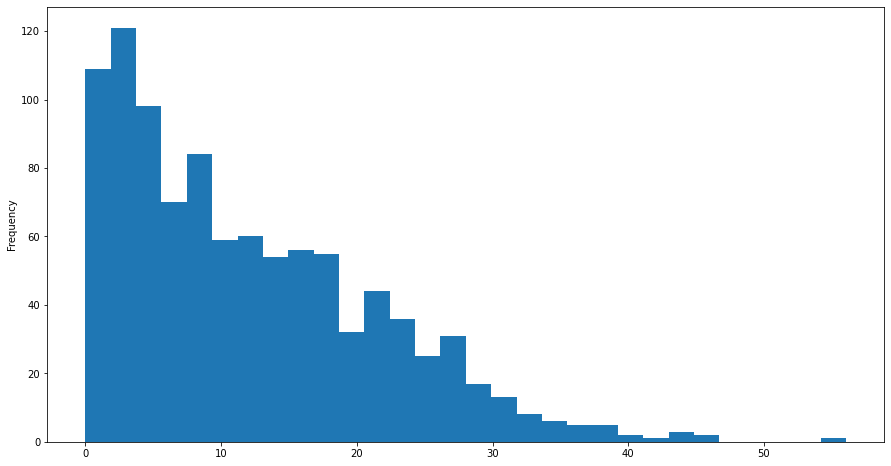

In [166]:
SNAP['Percent_with_SNAP'].plot.hist(figsize=(15,8),bins=30)

<AxesSubplot:ylabel='Frequency'>

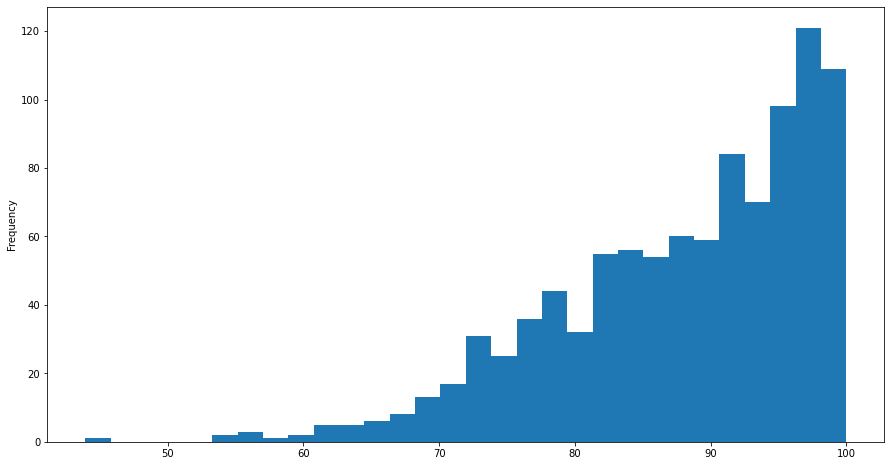

In [167]:
SNAP['Percent_without_SNAP'].plot.hist(figsize=(15,8),bins=30)

I'm curious how many census tracts have populations with 20% or more receiving public benefits. This appears to be the case in 206 out of 1,004 census tracts, or 20.5%. 

In [160]:
SNAP[SNAP['Percent_with_SNAP'] > 20]

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP,Percent_without_SNAP
16,14000US06037104105,"Census Tract 1041.05, Los Angeles, CA",1646.0,497.0,1149.0,"MULTIPOLYGON (((-118.41034 34.27466, -118.4099...",30.194411,69.805589
19,14000US06037104201,"Census Tract 1042.01, Los Angeles, CA",941.0,259.0,682.0,"MULTIPOLYGON (((-118.42402 34.28533, -118.4232...",27.523911,72.476089
22,14000US06037104310,"Census Tract 1043.10, Los Angeles, CA",849.0,174.0,675.0,"MULTIPOLYGON (((-118.44011 34.26727, -118.4399...",20.494700,79.505300
24,14000US06037104401,"Census Tract 1044.01, Los Angeles, CA",664.0,134.0,530.0,"MULTIPOLYGON (((-118.44088 34.26705, -118.4401...",20.180723,79.819277
26,14000US06037104404,"Census Tract 1044.04, Los Angeles, CA",678.0,170.0,508.0,"MULTIPOLYGON (((-118.43527 34.26176, -118.4336...",25.073746,74.926254
...,...,...,...,...,...,...,...,...
973,14000US06037296500,"Census Tract 2965, Los Angeles, CA",1306.0,279.0,1027.0,"MULTIPOLYGON (((-118.29891 33.74464, -118.2989...",21.362940,78.637060
974,14000US06037296600,"Census Tract 2966, Los Angeles, CA",1948.0,502.0,1446.0,"MULTIPOLYGON (((-118.29675 33.73607, -118.2967...",25.770021,74.229979
978,14000US06037297110,"Census Tract 2971.10, Los Angeles, CA",1558.0,335.0,1223.0,"MULTIPOLYGON (((-118.28793 33.73241, -118.2879...",21.501926,78.498074
987,14000US06037701100,"Census Tract 7011, Los Angeles, CA",48.0,17.0,31.0,"MULTIPOLYGON (((-118.46889 34.06587, -118.4687...",35.416667,64.583333


46 out of 1,004 (4.5%) of census tracts have populations with 30% and above receiving public benefits.

In [169]:
SNAP[SNAP['Percent_with_SNAP'] > 30]

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP,Percent_without_SNAP
16,14000US06037104105,"Census Tract 1041.05, Los Angeles, CA",1646.0,497.0,1149.0,"MULTIPOLYGON (((-118.41034 34.27466, -118.4099...",30.194411,69.805589
30,14000US06037104701,"Census Tract 1047.01, Los Angeles, CA",926.0,361.0,565.0,"MULTIPOLYGON (((-118.42190 34.26624, -118.4213...",38.984881,61.015119
31,14000US06037104703,"Census Tract 1047.03, Los Angeles, CA",572.0,176.0,396.0,"MULTIPOLYGON (((-118.40909 34.25446, -118.4072...",30.769231,69.230769
121,14000US06037117405,"Census Tract 1174.05, Los Angeles, CA",876.0,272.0,604.0,"MULTIPOLYGON (((-118.47297 34.23237, -118.4729...",31.050228,68.949772
143,14000US06037120103,"Census Tract 1201.03, Los Angeles, CA",848.0,264.0,584.0,"MULTIPOLYGON (((-118.45355 34.22826, -118.4535...",31.132075,68.867925
507,14000US06037203100,"Census Tract 2031, Los Angeles, CA",1239.0,466.0,773.0,"MULTIPOLYGON (((-118.20288 34.05456, -118.2028...",37.610977,62.389023
528,14000US06037205110,"Census Tract 2051.10, Los Angeles, CA",857.0,280.0,577.0,"MULTIPOLYGON (((-118.21963 34.02629, -118.2194...",32.672112,67.327888
529,14000US06037205120,"Census Tract 2051.20, Los Angeles, CA",977.0,307.0,670.0,"MULTIPOLYGON (((-118.22023 34.02056, -118.2201...",31.422723,68.577277
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",2433.0,952.0,1481.0,"MULTIPOLYGON (((-118.25041 34.04326, -118.2490...",39.128648,60.871352
564,14000US06037209103,"Census Tract 2091.03, Los Angeles, CA",1104.0,352.0,752.0,"MULTIPOLYGON (((-118.26605 34.05618, -118.2660...",31.884058,68.115942


Meanwhile, 299 out of 1,004 census tracks (29.7%) have 5% or less of their populations receiving public benefits. 

In [163]:
SNAP[SNAP['Percent_with_SNAP'] < 5]

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP,Percent_without_SNAP
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.295732,98.704268
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",4.982699,95.017301
6,14000US06037102103,"Census Tract 1021.03, Los Angeles, CA",692.0,8.0,684.0,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639...",1.156069,98.843931
10,14000US06037103101,"Census Tract 1031.01, Los Angeles, CA",897.0,44.0,853.0,"MULTIPOLYGON (((-118.31760 34.27387, -118.3175...",4.905240,95.094760
11,14000US06037103102,"Census Tract 1031.02, Los Angeles, CA",1623.0,72.0,1551.0,"MULTIPOLYGON (((-118.31575 34.26059, -118.3157...",4.436229,95.563771
...,...,...,...,...,...,...,...,...
993,14000US06037980015,"Census Tract 9800.15, Los Angeles, CA",350.0,11.0,339.0,"MULTIPOLYGON (((-118.31048 33.76685, -118.3102...",3.142857,96.857143
996,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",8.0,0.0,8.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017...",0.000000,100.000000
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",75.0,0.0,75.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184...",0.000000,100.000000
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,0.0,4.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",0.000000,100.000000


504 out of 1,004 (50%) census tracts have populations with below 10% receiving public benefits, which reflects what we see in the histograms above. 

In [170]:
SNAP[SNAP['Percent_with_SNAP'] < 10]

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP,Percent_without_SNAP
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,17.0,1295.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.295732,98.704268
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,1373.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",4.982699,95.017301
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1355.0,94.0,1261.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221...",6.937269,93.062731
6,14000US06037102103,"Census Tract 1021.03, Los Angeles, CA",692.0,8.0,684.0,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639...",1.156069,98.843931
8,14000US06037102105,"Census Tract 1021.05, Los Angeles, CA",559.0,28.0,531.0,"MULTIPOLYGON (((-118.35307 34.20878, -118.3530...",5.008945,94.991055
...,...,...,...,...,...,...,...,...
994,14000US06037980019,"Census Tract 9800.19, Los Angeles, CA",65.0,5.0,60.0,"MULTIPOLYGON (((-118.59919 34.07436, -118.5991...",7.692308,92.307692
996,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",8.0,0.0,8.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017...",0.000000,100.000000
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",75.0,0.0,75.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184...",0.000000,100.000000
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,0.0,4.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",0.000000,100.000000


I want to know how many census tracts have greater than 0% of their population receiving benefits. 967 (96.3%) census tracts have populations receiving benefits.

In [98]:
above_zero_SNAP = [SNAP['Percent_with_SNAP'] > 0]
above_zero_SNAP

[1        True
 2        True
 3        True
 4        True
 5        True
         ...  
 1000    False
 1001    False
 1002    False
 1003    False
 1004     True
 Name: Percent_with_SNAP, Length: 1004, dtype: bool]

This leaves 37 census tracts (3.7%)with 0% of their population receiving benefits.

In [99]:
zero_SNAP = [SNAP['Percent_with_SNAP'] == 0]
zero_SNAP

[1       False
 2       False
 3       False
 4       False
 5       False
         ...  
 1000     True
 1001    False
 1002     True
 1003    False
 1004    False
 Name: Percent_with_SNAP, Length: 1004, dtype: bool]

I want to know what the highest percent receiving benefits is across the LA census tracts. I use the .sort_values command and see that the highest percentage is 56%. I already know that the lowest percent is 0%.

In [100]:
SNAP.sort_values(by='Percent_with_SNAP',ascending = False)

,geoid,Census_tract,Total,Cash_public_assistance_or_Food_Stamps,No_cash_public_assistance_or_Food_Stamps,geometry,Percent_with_SNAP,Percent_without_SNAP
817,14000US06037242100,"Census Tract 2421, Los Angeles, CA",751.0,421.0,330.0,"MULTIPOLYGON (((-118.23675 33.94491, -118.2367...",56.058589,43.941411
720,14000US06037228900,"Census Tract 2289, Los Angeles, CA",714.0,326.0,388.0,"MULTIPOLYGON (((-118.24776 33.99484, -118.2455...",45.658263,54.341737
726,14000US06037231100,"Census Tract 2311, Los Angeles, CA",692.0,312.0,380.0,"MULTIPOLYGON (((-118.28275 34.01566, -118.2824...",45.086705,54.913295
738,14000US06037232120,"Census Tract 2321.20, Los Angeles, CA",1357.0,597.0,760.0,"MULTIPOLYGON (((-118.28713 33.99644, -118.2870...",43.994105,56.005895
701,14000US06037226001,"Census Tract 2260.01, Los Angeles, CA",604.0,265.0,339.0,"MULTIPOLYGON (((-118.26218 34.02861, -118.2616...",43.874172,56.125828
...,...,...,...,...,...,...,...,...
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438...",NaN,NaN
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026...",NaN,NaN
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480...",NaN,NaN
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,0.0,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464...",NaN,NaN


Now it's time to visualize these findings. I import the contextily and matplotlib libraries into my Jupyter notebook.

In [101]:
import contextily as ctx

import matplotlib.pyplot as plt

I create a basic map with all of my data using .plot. It should be in the shape of Los Angeles and it is!

<AxesSubplot:>

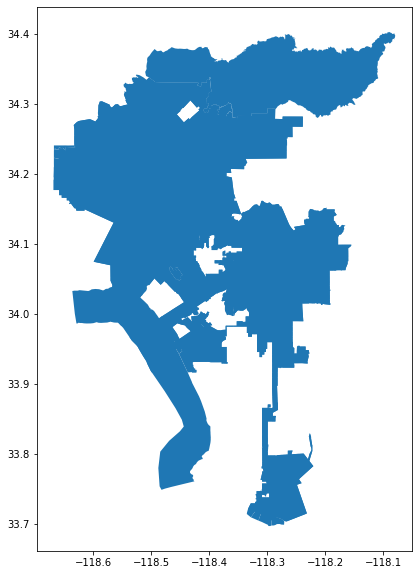

In [103]:
SNAP.plot(figsize=(10,10))

I want to see where the census tracts with 0 benefits recipients are located. 

<AxesSubplot:>

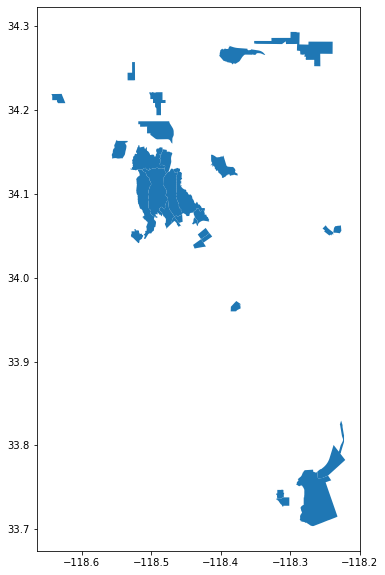

In [108]:
SNAP[SNAP['Percent_with_SNAP'] == 0].plot(figsize=(10,10)) 

I wanted to try to create the same map using the other "Percent_without_SNAP" variable. It looks the same, which makes sense.

<AxesSubplot:>

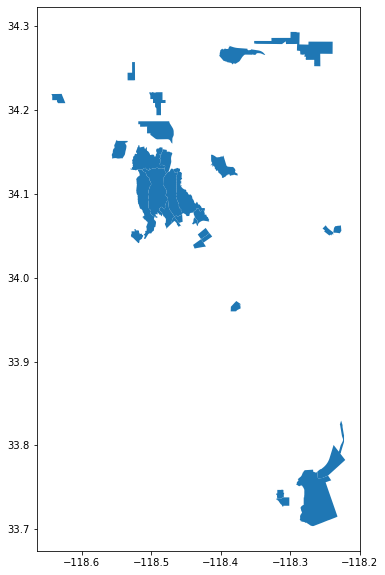

In [110]:
SNAP[SNAP['Percent_without_SNAP']==100].plot(figsize=(10,10)) 

I know where the census tracts with 0 benefits recipients are located. Now I want to know where the census tracks with above 20% are located. 

<AxesSubplot:>

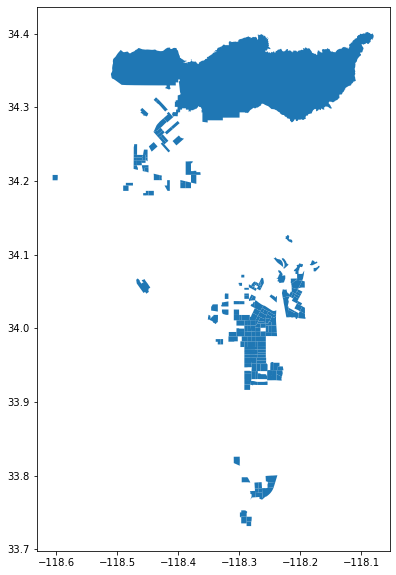

In [111]:
SNAP[SNAP['Percent_with_SNAP']>20].plot(figsize=(10,10)) 

I create a map of census tracts by percent of population receiving benefits. I use quantiles, which appears to be the most appropriate way to divide the data. The map below shows that most census tracts fall within the 7.53%-12.94% range. I'm confused as to why such a large number of recipients live in the northeastern part of the city. I believe that this area is the Angeles National Forest.

<AxesSubplot:>

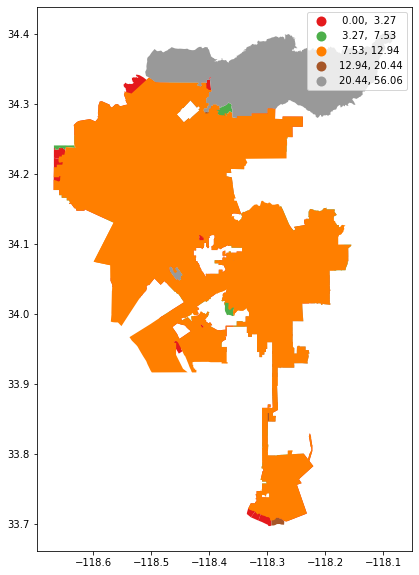

In [117]:
SNAP.plot(figsize=(10,10),
                 column='Percent_with_SNAP',
                 legend=True, 
                 scheme='quantiles',
                 cmap='Set1'
        )

I now do the same for "Percent_without_SNAP" which should look identital to the map above but with opposite percents. I use different colors here to distinguish from the above.

<AxesSubplot:>

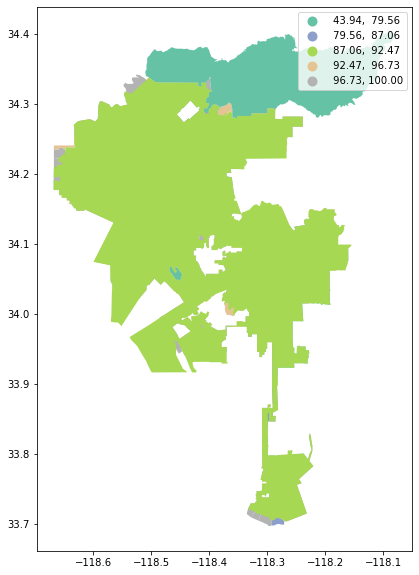

In [145]:
SNAP.plot(figsize=(10,10),
                 column='Percent_without_SNAP',
                 legend=True, 
                 scheme='quantiles',
                 cmap='Set2'
        )

Lastly, I bring in base maps to give greater context. The map on the left shows census tracts with greater than 20% of the population receiving benefits. The map on the right shows census tracts with less than 5% of the population receiving benefits. As you can see, census tracts in south and central parts of the city, along with the very north east of LA, have high concentrations of households receiving benefits. Census tracts with less than 5% receiving benefits are clustered in the north west of the city. 

In [121]:
SNAP_web_mercator = SNAP.to_crs(epsg=3857)

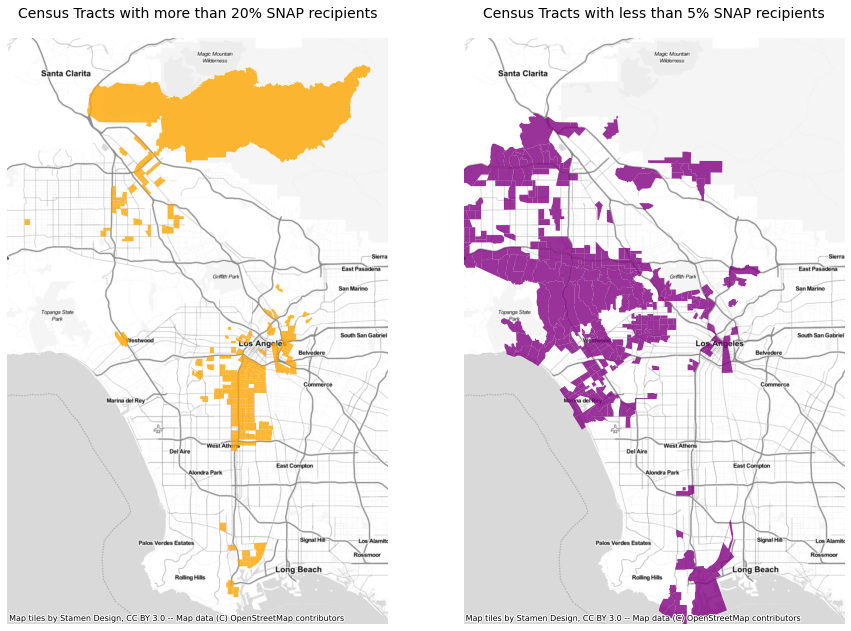

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

ax1, ax2 = axs

SNAP_web_mercator[SNAP_web_mercator['Percent_with_SNAP'] > 20].plot(ax=ax1, 
                                                                           alpha=0.8, 
                                                                           color="orange")

ax1.axis("off")
ax1.set_title('Census Tracts with more than 20% SNAP recipients',fontsize=14, pad=20)

ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite)

SNAP_web_mercator[SNAP_web_mercator['Percent_with_SNAP'] < 5].plot(ax=ax2, 
                                                                           alpha=0.8, 
                                                                           color="purple")

ax2.axis("off")
ax2.set_title('Census Tracts with less than 5% SNAP recipients',fontsize=14, pad=20)
ctx.add_basemap(ax2,source=ctx.providers.Stamen.TonerLite)